part of project salary estimate for data science roles
author: Swarali Desai
dated: 05/09/2020

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('csv_files/salary_data_eda.csv')

In [4]:
# choose relevant columns
df_model = df[['avg_salary', 'Location','Industry','Sector','Revenue', 'Size','age' ,'python', 'sas', 'aws', 'spark',
       'sql', 'tableau', 'tensorflow', 'nltk', 'power bi', 'excel', 'hadoop',
       'azure', 'scikit-learn', 'r_prog', 'degree_req', 'job_simplifier', 'seniority', 'desc_len', 'competitor_count']]

In [5]:
# get dummy data for categorical variable
df_dummies = pd.get_dummies(df_model)
print(len(df_dummies.columns))

151


In [6]:
# train test split
X = df_dummies.drop('avg_salary', axis=1)
y = df_dummies.avg_salary.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# multiple linearregression using statsmodel
x_sm = sm.add_constant(X)
model = sm.OLS(y, x_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     2.628
Date:                Wed, 09 Sep 2020   Prob (F-statistic):           1.22e-12
Time:                        14:20:44   Log-Likelihood:                -6902.9
No. Observations:                 475   AIC:                         1.406e+04
Df Residuals:                     347   BIC:                         1.459e+04
Df Model:                         127                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                             5.088e+05   1.22e+05      4.160      0.000    2.68e+05    7.49e+05
age                                               2555.9574   1003.342      2.547      0.011     582.561    4529.354
python                                           -6.595e+04   8.34e+04     -0.791      0.429    -2.3e+05     9.8e+04
sas                                              -2.945e+04   1.26e+05     -0.234      0.815   -2.76e+05    2.18e+05
aws                                               1.075e+05   8.29e+04      1.296      0.196   -5.56e+04    2.71e+05
spark                                            -1.621e+04   1.03e+05     -0.158      0.875   -2.19e+05    1.86e+05
sql                                              -1.587e+05   8.01e+04     -1.982      0.048   -3.16e+05   -1227.361
tableau                                           1.153e+05   1.01e+05      1.145      0.253   -8.28e+04    3.13e+05
tensorflow                                       -2.589e+04   1.11e+05     -0.233      0.816   -2.45e+05    1.93e+05
nltk                                             -1.236e+05   2.03e+05     -0.610      0.542   -5.22e+05    2.75e+05
power bi                                          1.745e+05   1.53e+05      1.138      0.256   -1.27e+05    4.76e+05
excel                                            -9.269e+04   6.56e+04     -1.414      0.158   -2.22e+05    3.63e+04
hadoop                                            6.245e+04   1.04e+05      0.602      0.547   -1.41e+05    2.66e+05
azure                                             -1.31e+05   1.13e+05     -1.158      0.248   -3.54e+05    9.15e+04
scikit-learn                                      3.498e+05   1.62e+05      2.154      0.032    3.03e+04    6.69e+05
r_prog                                            2.607e+04   9.27e+04      0.281      0.779   -1.56e+05    2.08e+05
degree_req                                        1.857e+04   1.33e+05      0.139      0.889   -2.43e+05    2.81e+05
desc_len                                            45.7675     24.103      1.899      0.058      -1.639      93.174
competitor_count                                  1.055e+05   6.47e+04      1.631      0.104   -2.18e+04    2.33e+05
Location_Ahmedabad                                1.782e+05   2.89e+05      0.617      0.538    -3.9e+05    7.46e+05
Location_Andheri                                 -5.175e+05   8.67e+05     -0.597      0.551   -2.22e+06    1.19e+06
Location_Andhra Pradesh                           1.454e+05   6.45e+05      0.225      0.822   -1.12e+06    1.41e+06
Location_Bagalur                                  2.446e+05   5.97e+05      0.410      0.682    -9.3e+05    1.42e+06
Location_Bengaluru                       

In [8]:
# linear regression using sklearn
lm = LinearRegression().fit(X_train, y_train)
np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv=3))

-486754.18713867426

which means our model is off by 520742

In [9]:
# lasso
lm_l = Lasso()
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv=3))

-482647.98565296247

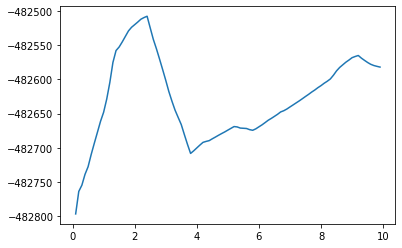

In [10]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/10)
    lml = Lasso(alpha=(i/10))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)

In [11]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
23,2.4,-482507.584761


In [15]:
lm_l = Lasso(alpha=2.4)
lm_l.fit(X_train,y_train)

Lasso(alpha=2.4, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [16]:
# random forest regressor
rf = RandomForestRegressor()
np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

-437419.33384754136

In [17]:
# tune models with GridsearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}
gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [18]:
gs.best_score_

-420006.6842264509

In [19]:
gs.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=80, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [20]:
# test ensembles 
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

In [21]:
mean_absolute_error(y_test,tpred_lm)

513558.01336088905

In [22]:
mean_absolute_error(y_test,tpred_lml)

511681.8190750229

In [23]:
mean_absolute_error(y_test,tpred_rf)

453561.53388157894

In [24]:
mean_absolute_error(y_test,(tpred_lm+tpred_rf)/2)

461413.2756308548

In [25]:
import pickle
pickl = {'model': gs.best_estimator_}
pickle.dump( pickl, open( './flaskAPI/models/model_file' + ".p", "wb" ) )

file_name = "./flaskAPI/models/model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']

model.predict(np.array(list(X_test.iloc[1,:])).reshape(1,-1))[0]

# list(X_test.iloc[1,:])

1056493.6875